<a href="https://colab.research.google.com/github/rachel1234561/DS-2002/blob/main/Rachel_ACC_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/fourfeatherz/DS2002F24

Cloning into 'DS2002F24'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 183 (delta 52), reused 49 (delta 28), pack-reused 97 (from 1)
Receiving objects: 100% (183/183), 16.35 MiB | 26.12 MiB/s, done.
Resolving deltas: 100% (68/68), done.


1. Reading the CSV File:
- Load the provided CSV file into a pandas DataFrame.
- Display the first 5 rows of the DataFrame to understand the structure of the data.

In [5]:
import pandas as pd

acc_playersdf = pd.read_csv('/content/DS2002F24/homework/acc_players-2324F.csv')
acc_playersdf.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Shooting,Unnamed: 15,Unnamed: 16,Unnamed: 17,Advanced,Unnamed: 19,Unnamed: 20
0,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2


In [6]:
# to fix the fact that the collunms were unnamed and that what should be the names
#is the first row I used the AI prompt: make the first row the names of the collums

acc_playersdf.columns = acc_playersdf.iloc[0]
acc_playersdf = acc_playersdf[1:]
acc_playersdf.head()


,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


2. Basic Analysis:
- Calculate the total points scored by all players combined.
- Find the player who has played the most minutes (MP).
- Identify the top 5 players in terms of total rebounds (TRB).

In [9]:
print(acc_playersdf.columns.tolist())

['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']


In [17]:
total_points = acc_playersdf['PTS'].astype(int).sum()
print("Total points scored by all players:", total_points)

Total points scored by all players: 38411


In [26]:
most_min = acc_playersdf.loc[acc_playersdf['MP'].astype(int).idxmax()]
print("The player with the most minutes played is", most_min['Player'], "who played", most_min ['MP'],"minutes" )

The player with the most minutes played is Casey Morsell who played 1333 minutes


In [65]:
print("The top 5 rebounders:")

acc_playersdf['TRB'] = pd.to_numeric(acc_playersdf['TRB'], errors='coerce')
top_5_rebounders = acc_playersdf[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)

#I used the build in AI debugging feature to make this part disply like I wanted
print(top_5_rebounders.to_string(index=False),)

The top 5 rebounders:
         Player  TRB
  Armando Bacot  380
Ian Schieffelin  340
Harrison Ingram  327
 Mohamed Diarra  311
  Norchad Omier  309


3. Player Filtering:
- Create a new DataFrame containing only players who played more than 500 minutes.
- From this filtered DataFrame, determine the player with the highest total assists (AST).
- Who are the top 3 Assist Leads in the League?
- Who are the top 3 Shot Blockers?

In [36]:
over500_df = acc_playersdf[acc_playersdf['MP'].astype(int) > 500]
print(over500_df)

0     Rk            Player Class Pos          School   G    MP  TRB  AST STL  \
3      3     Prince Aligbe    SO   F  Boston College  35   651  119   21  15   
5      5       Zack Austin    JR   F      Pittsburgh  33   746  137   29  32   
6      6     Armando Bacot    SR   F  North Carolina  37  1123  380   56  22   
8      8     Reece Beekman    SR   G        Virginia  34  1114  124  212  68   
10    10        Chris Bell    SO   F        Syracuse  32   865   75   21  18   
..   ...               ...   ...  ..             ...  ..   ...  ...  ...  ..   
204  204     Jamir Watkins    JR   F   Florida State  33   928  199   91  64   
207  207         Tre White    SO   G      Louisville  29   907  170   39  24   
208  208  Chauncey Wiggins    SO   F         Clemson  36   639   76   33   6   
210  210   Curtis Williams    FR   G      Louisville  32   564   42   20  12   
216  216    Jaeden Zackery    JR   G  Boston College  36  1216  119  152  63   

0    ... TOV   PF  PTS    FG%    2P%   

In [37]:
most_assist = over500_df.loc[over500_df['AST'].astype(int).idxmax()]
print("The player with the most assists (who played over 500 minutes) is", most_assist['Player'], "who had", most_assist ['AST'],"assists" )

The player with the most assists (who played over 500 minutes) is Reece Beekman who had 212 assists


In [68]:
over500_df['AST'] = pd.to_numeric(over500_df['AST'], errors='coerce')
three_most_assist = over500_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print(three_most_assist.to_string(index=False))

        Player  AST
 Reece Beekman  212
Jaeden Zackery  152
 Elliot Cadeau  150


<ipython-input-68-67edbb987e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over500_df['AST'] = pd.to_numeric(over500_df['AST'], errors='coerce')


In [99]:
over500_df['BLK'] = pd.to_numeric(over500_df['BLK'], errors='coerce')
three_most_blockshot = over500_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print(three_most_blockshot.to_string(index=False))

       Player  BLK
    Ryan Dunn   77
 Quinten Post   61
Armando Bacot   56


<ipython-input-99-841fc7e738e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over500_df['BLK'] = pd.to_numeric(over500_df['BLK'], errors='coerce')


4. School-Based Analysis:
- Group the players by School and calculate the total points scored by each school.
- Group the players by School and calculate the total assists (AST) for each team.
- Sort the schools by total points scored and display the top 3 schools.

In [77]:
# Grouping the data by 'School'
acc_teams = acc_playersdf.groupby('School')

In [87]:
# prompt: calculate the total points scored by each school.

acc_playersdf['PTS'] = pd.to_numeric(acc_playersdf['PTS'], errors='coerce')
total_points_by_school = acc_teams['PTS'].sum()
total_points_by_school.sort_values(ascending=False)


,PTS
School,
NC State,3101
North Carolina,3032
Duke,2830
Clemson,2785
Wake Forest,2733
Boston College,2667
Virginia Tech,2547
Florida State,2526
Pittsburgh,2495


In [84]:
acc_playersdf['AST'] = pd.to_numeric(acc_playersdf['AST'], errors='coerce')
total_assists_by_school = acc_teams['AST'].sum()
print(total_assists_by_school)

School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64


In [85]:
top_3_schools = total_points_by_school.sort_values(ascending=False).head(3)
print("Top 3 schools by total points scored:")
print(top_3_schools)

Top 3 schools by total points scored:
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


5. Extra Credit (Bonus):
- Create a bar chart showing the top 5 players by total points scored (PTS).
- Correlation: Investigate whether there is any correlation between a player's field goal
percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
correlation coefficient.

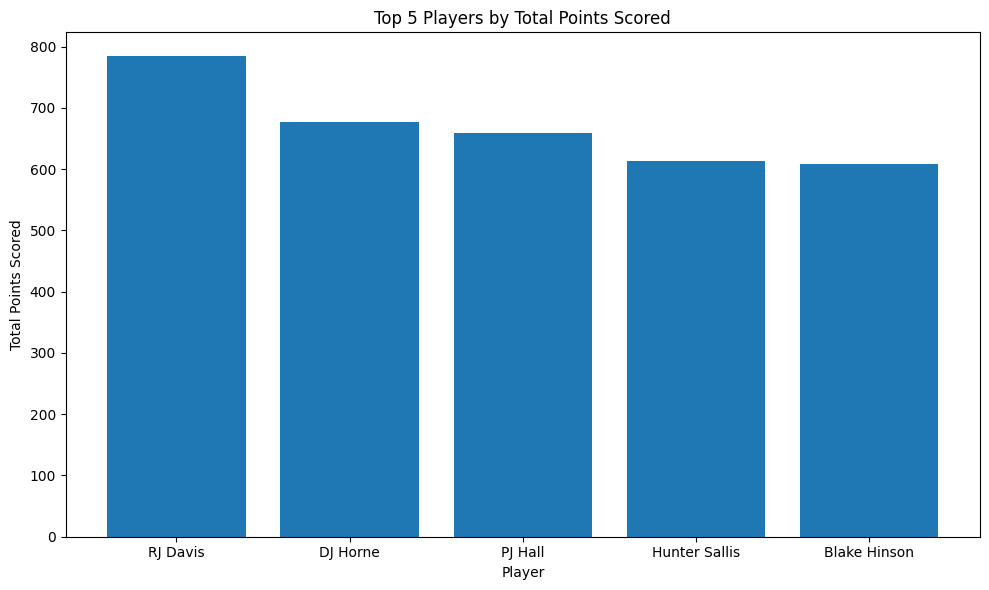

In [90]:
import matplotlib.pyplot as plt
top_5_scorers = acc_playersdf.sort_values('PTS', ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'].astype(int))
plt.xlabel('Player')
plt.ylabel('Total Points Scored')
plt.title('Top 5 Players by Total Points Scored')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


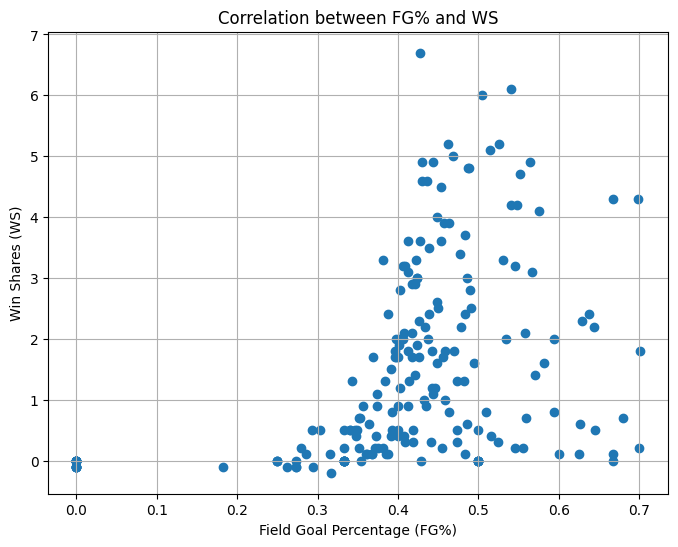

In [93]:
acc_playersdf['FG%'] = pd.to_numeric(acc_playersdf['FG%'], errors='coerce')
acc_playersdf['WS'] = pd.to_numeric(acc_playersdf['WS'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(acc_playersdf['FG%'], acc_playersdf['WS'])
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.title('Correlation between FG% and WS')
plt.grid(True)
plt.show()

In [96]:
correlation = acc_playersdf['FG%'].corr(acc_playersdf['WS'])
print ("correlation coefficient:",correlation)

correlation coefficient: 0.4210663894199787
